In [3]:
from google.colab import drive
drive.mount("/content/drive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# reading the dataset from Google drive into our DataFrame
df=pd.read_csv('/content/drive/My Drive/INSAID/wine.csv')
df.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [6]:
#  Putting feature variables  to X
X = df.drop(['name'],axis=1)

y= df['name']#class variable

In [8]:
# Train Test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 90) 


In [9]:
# Importing Standard Scaler from sklearn for normalizing the data
# if normalization is not done,
# importance of columns like "proline" where values are in the range like 500, 1000 etc will have much much higher impact in overall calculations
# 

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [10]:
# importing PCA from sklearn
# when creating object using PCA () if n_components is not set and also expected % variance is also not provided
# then all "Principal Components" will be considered
from sklearn.decomposition import PCA
pca = PCA()

In [11]:
# providing X_train to pca object created above to learn about the properties of dataset
pca.fit_transform(X_train)

array([[-0.13197353, -2.81299567,  0.023459  , ...,  0.68460107,
         0.38684865,  0.22443437],
       [-3.56830448,  1.63504827,  0.02029035, ...,  0.48926736,
        -0.08465599,  0.0719787 ],
       [ 3.31970678,  0.1556735 ,  1.63830766, ..., -0.12206032,
         0.31249146, -0.07180105],
       ...,
       [ 0.65928291, -3.6370995 , -1.33617325, ...,  0.33824748,
         0.37494051,  0.11462182],
       [-1.07410495,  3.65774742, -0.91346393, ..., -0.21987919,
         0.25264567,  0.60847847],
       [-1.81915381, -1.50097839,  0.19877512, ..., -0.2385404 ,
        -0.46117597, -0.31332876]])

In [12]:
#  X_train, is the data that was taken into consideration for PCA transformation 
X_train

array([[-1.4531345 , -0.7988835 , -1.26808933, ..., -0.03710378,
         1.07818693, -0.77583604],
       [ 0.25736053,  2.52886725, -0.1015374 , ..., -1.58100902,
        -1.56683386, -0.05589891],
       [ 0.10531653, -0.56629877, -1.09133904, ...,  0.71279305,
         0.47769572,  1.2744197 ],
       ...,
       [-2.45409085, -0.76310124, -0.5257381 , ...,  3.31537616,
         0.42050608, -1.05129025],
       [ 1.73978956, -0.61102661,  1.24176482, ..., -1.71334375,
        -0.88055819, -0.25935941],
       [-0.35081548, -0.7452101 , -0.31363775, ...,  0.0070078 ,
        -0.7375841 , -0.77583604]])

In [13]:
# pca.components_ tells us composition of pca components, 
# coef's that were used in creating them
# are converting those coef's into a dataframe with pd.DataFrame
pca_components_df = pd.DataFrame(pca.components_)
pca_components_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.127584,-0.247716,-0.035983,-0.251695,0.101423,0.391634,0.430127,-0.296061,0.314232,-0.073368,0.310106,0.379213,0.278021
1,0.492494,0.165419,0.361425,0.037780,0.304752,0.070756,0.002768,0.040729,0.038803,0.525837,-0.218816,-0.157512,0.384426
2,0.201221,-0.207996,-0.559820,-0.605158,-0.068425,-0.170959,-0.143469,-0.098568,-0.229563,0.180377,-0.044902,-0.238838,0.167721
3,-0.132652,-0.437526,0.204483,0.061730,0.642908,-0.195651,-0.160585,-0.036714,-0.310120,-0.170260,0.340970,-0.124316,0.098628
4,-0.181104,0.249014,-0.228534,0.048413,0.457792,-0.061145,-0.042564,-0.643398,0.215315,-0.014874,-0.379404,-0.022252,-0.174681


In [14]:
pca_components_df = pd.DataFrame({'PC1_coef':pca.components_[0],'PC2_coef':pca.components_[1],'PC3_coef':pca.components_[2], 'PC4_coef':pca.components_[3], 
                       'PC5_coef':pca.components_[4],'PC6_coef':pca.components_[5],'PC7_coef':pca.components_[6], 'PC8_coef':pca.components_[7], 
                       'PC9_coef':pca.components_[8],'PC10_coef':pca.components_[9],'PC11_coef':pca.components_[10], 'PC12_coef':pca.components_[11],
                       'PC13_coef':pca.components_[12]})

pca_components_df.head()

,PC1_coef,PC2_coef,PC3_coef,PC4_coef,PC5_coef,PC6_coef,PC7_coef,PC8_coef,PC9_coef,PC10_coef,PC11_coef,PC12_coef,PC13_coef
0,0.127584,0.492494,0.201221,-0.132652,-0.181104,-0.213307,-0.204372,-0.423273,-0.398335,-0.306394,-0.246077,-0.253044,0.082010
1,-0.247716,0.165419,-0.207996,-0.437526,0.249014,-0.634188,0.337158,-0.073113,0.001985,0.295799,0.036209,0.064205,-0.020615
2,-0.035983,0.361425,-0.559820,0.204483,-0.228534,-0.081250,-0.179561,0.179083,0.404402,-0.009705,-0.457261,0.066597,0.112092
3,-0.251695,0.037780,-0.605158,0.061730,0.048413,0.178476,-0.288314,-0.310948,-0.218354,-0.000407,0.512624,-0.181766,-0.087657
4,0.101423,0.304752,-0.068425,0.642908,0.457792,-0.033154,0.376544,0.094943,-0.319121,-0.058569,-0.024170,0.057671,-0.090423


In [15]:
# We need to source actual column labels, we decide to use X (please remember X over here is obtained after we removed the "Target column "name"..")
X.head()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [16]:
# creating list colnames that will hold labels of original columns 
colnames=list(X.columns)

In [17]:
# to find out details "1st Principal component" which columns from original dataframe  
# pca.components_[0]contains data for 1st column

pc1_df = pd.DataFrame({'PC1_coef':pca.components_[0],
                       'Feature': colnames})

pc1_df.head(15)

,PC1_coef,Feature
0,0.127584,alcohol
1,-0.247716,malicAcid
2,-0.035983,ash
3,-0.251695,ashalcalinity
4,0.101423,magnesium
5,0.391634,totalPhenols
6,0.430127,flavanoids
7,-0.296061,nonFlavanoidPhenols
8,0.314232,proanthocyanins
9,-0.073368,colorIntensity


In [18]:
# to see details of linear combinations using which any principal component is created 
# we are utilizing the component details and column names stored in colnames 

pc_component_breakup_df = pd.DataFrame({'PC1_coef':pca.components_[0],'PC2_coef':pca.components_[1],'PC3_coef':pca.components_[2], 'PC4_coef':pca.components_[3], 
                       'PC5_coef':pca.components_[4],'PC6_coef':pca.components_[5],'PC7_coef':pca.components_[6], 'PC8_coef':pca.components_[7], 
                       'PC9_coef':pca.components_[8],'PC10_coef':pca.components_[9],'PC11_coef':pca.components_[10], 'PC12_coef':pca.components_[11],
                       'PC13_coef':pca.components_[12], 'Feature': colnames})


In [19]:
# full details of nxn matrix that contains coef's using which Principal components get created
pc_component_breakup_df.head(15)

,PC1_coef,PC2_coef,PC3_coef,PC4_coef,PC5_coef,PC6_coef,PC7_coef,PC8_coef,PC9_coef,PC10_coef,PC11_coef,PC12_coef,PC13_coef,Feature
0,0.127584,0.492494,0.201221,-0.132652,-0.181104,-0.213307,-0.204372,-0.423273,-0.398335,-0.306394,-0.246077,-0.253044,0.082010,alcohol
1,-0.247716,0.165419,-0.207996,-0.437526,0.249014,-0.634188,0.337158,-0.073113,0.001985,0.295799,0.036209,0.064205,-0.020615,malicAcid
2,-0.035983,0.361425,-0.559820,0.204483,-0.228534,-0.081250,-0.179561,0.179083,0.404402,-0.009705,-0.457261,0.066597,0.112092,ash
3,-0.251695,0.037780,-0.605158,0.061730,0.048413,0.178476,-0.288314,-0.310948,-0.218354,-0.000407,0.512624,-0.181766,-0.087657,ashalcalinity
4,0.101423,0.304752,-0.068425,0.642908,0.457792,-0.033154,0.376544,0.094943,-0.319121,-0.058569,-0.024170,0.057671,-0.090423,magnesium
5,0.391634,0.070756,-0.170959,-0.195651,-0.061145,0.089235,-0.030380,0.479383,-0.393055,0.352046,0.075688,-0.248449,0.431037,totalPhenols
6,0.430127,0.002768,-0.143469,-0.160585,-0.042564,-0.025223,-0.052761,0.128881,-0.033931,0.080905,-0.091437,-0.156860,-0.840302,flavanoids
7,-0.296061,0.040729,-0.098568,-0.036714,-0.643398,0.129300,0.561923,0.169855,-0.257331,-0.194527,0.053872,0.031105,-0.128095,nonFlavanoidPhenols
8,0.314232,0.038803,-0.229563,-0.310120,0.215315,0.463905,0.468402,-0.373544,0.237098,-0.143593,-0.135215,-0.101275,0.158120,proanthocyanins
9,-0.073368,0.525837,0.180377,-0.170260,-0.014874,0.402431,-0.114729,-0.041475,-0.053718,0.375170,0.085843,0.560420,-0.120230,colorIntensity


In [20]:
# The code in this cell was used to download X_train which contains scaled values of original dataframe (minus the target column) 
# you can ignore this as the output from here was used to showcase how we obtain values inside PCA dataframe 
# dataframename.T creates a "Transpose" 
pc_component_breakup_df=pc_component_breakup_df.T

# code to download coef details for all PCs and the related origianl column names
pc_component_breakup_df.to_csv('pc_component_breakup_df.csv')
from google.colab import files
files.download('pc_component_breakup_df.csv')


# X_train is the numpy array that stored scaled values X_train
# 1st we are converting that to a dataframe
df1=pd.DataFrame(data=X_train, columns=colnames)

# now we are downloading the dataframe into csv
df1.to_csv('X_train.csv')
from google.colab import files
files.download('X_train.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# function pca.fit_transform takes X_train as input we are saving the output in X_train_pc
X_train_pc = pca.fit_transform(X_train) 
# we are converting X_train_pc into a dataframe to view details of PCA transfored columns
df2=pd.DataFrame(X_train_pc)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.131974,-2.812996,0.023459,-0.122554,0.382039,0.251459,-0.538667,-0.043800,0.138200,-0.735349,0.684601,0.386849,0.224434
1,-3.568304,1.635048,0.020290,-1.636233,-0.108469,-0.202435,1.370062,-0.132957,-0.055571,0.267393,0.489267,-0.084656,0.071979
2,3.319707,0.155673,1.638308,-1.311516,0.558239,0.873133,0.597013,-0.487266,1.203496,0.525790,-0.122060,0.312491,-0.071801
3,-1.270529,-0.588045,-1.613610,1.533937,-1.703344,-0.581876,0.925645,0.611977,0.754457,0.510394,-0.669100,0.759365,-0.600608
4,2.448869,-1.899795,1.607752,-1.783220,-0.135755,1.117979,-0.318440,-0.422469,-0.707486,0.282339,-0.258116,0.135641,-0.122399


Confirming the claim: PCA gives us output where Multicollinearity is eliminated

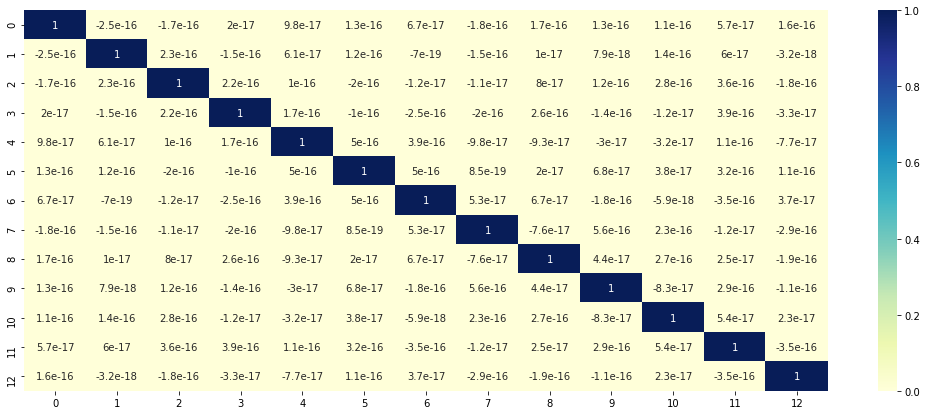

In [22]:
# checking correlation inside the dataset
plt.figure(figsize = (18, 7))
sns.heatmap(df2.corr(), annot = True, cmap="YlGnBu")
plt.show()

 

*   The above output has numbers that show correlation coef's as close to 0
*   2.5e-16 = 2.5 / 1000000000000000 i.e. 2.5 divided by 10000000000000000




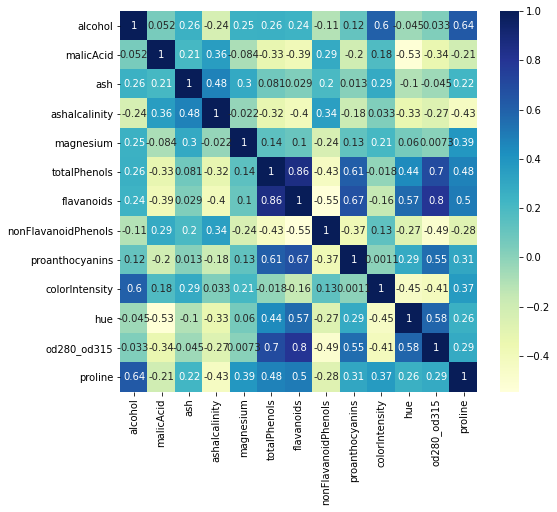

In [19]:
# checking correlation inside the dataset
plt.figure(figsize = (8, 7))
sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu")
plt.show()




*   So original dataset has corrleation coef that were not 0 (output for df1.corr()), infact we can see numbers like 0.86, 0.69, 0.67, 0.61, 0.57 
*   PCA transformed dataset has corrleation coef that are  close to 0 (output for df1.corr())



Moving to actual use of PCA : We are going to use PCA for logistics regression

In [23]:
df=pd.read_csv('/content/drive/My Drive/INSAID/wine.csv')
df.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [24]:
#  Putting feature variables to X
X = df.drop(['name'],axis=1)

y= df['name']#class variable

# performing preprocessing part 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 90) 

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [27]:
# Getting the PCA funtion from sklearn
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

In [28]:
# details on variance or information on how it gets distributed between each component
pca.explained_variance_ratio_

array([0.35842778, 0.19489886, 0.10971699, 0.07805652, 0.06727507,
       0.04838466, 0.03858855, 0.02621587, 0.02281445, 0.0191108 ,
       0.0170037 , 0.01236233, 0.00714444])

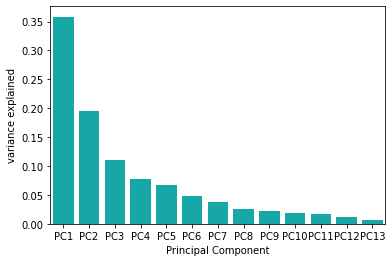

In [29]:
# details on variance or information on how it gets distributed between each component, viewing it with help of bar plots
df = pd.DataFrame({'variance explained':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']})
sns.barplot(x='Principal Component',y="variance explained", 
           data=df, color="c");

Text(0.5, 1.0, 'Scree Plot')

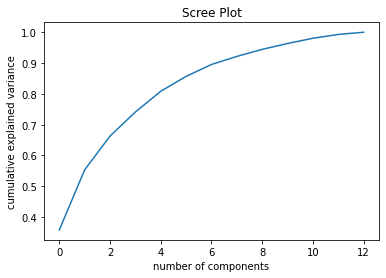

In [30]:
# Scree plot to see cumlative variance, how it progresses with a total set of PCs
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Plot')

In [31]:
# after getting satisfied with views above we are creating PCA object to include 95% of information into use
# using option  to set % of variance expected in output
pca = PCA(.95)

# other option to use number of components by viewing the scree plot
#pca = PCA(n_components = 2) 

In [32]:
# the pca object fits and tranforms X_train and only transforms X_test
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 


In [33]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# Predicting the test set result using model we created "classfier"
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test)

In [35]:
# making confusion matrix between 
# test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred) 
cm

array([[14,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]])

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

